<div class="warning" style='background-color:#AEC6CF; color: #000435; border-left: solid #003e87 10px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>ĐỒ ÁN CUỐI KỲ</b>
<p style='margin-top:1em; text-align:center'>
<b>CSC17104 - Lập trình cho Khoa học Dữ liệu, 21KHDL1</b></p>
<p style='margin-left:1em;'>

**Thành viên thực hiện:**
- 21127612 - Nguyễn Khánh Hoàng ('nkhoang21@clc.fitus.edu.vn')
- 21127423 - Trần Hiếu Tâm ('thtam21@clc.fitus.edu.vn')

**Tên đề tài:** Phân tích mức lương của Lập trình viên trên toàn cầu, giai đoạn 2021-2023 <br><br>
</p>
</p></span>
</div>

**<h1><center>Phần 2: Khám phá và tiền xử lý dữ liệu</center></h1>**
<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; font-family:arial; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục</b></h3>
    
   * [1. Khám phá dữ liệu](#1)
        - [Đọc dữ liệu](#11)
        - [Dữ liệu có bao nhiêu dòng và cột?](#12)
        - [Ý nghĩa của mỗi dòng; Có dòng nào bị trùng không?](#13)
        - [Ý nghĩa từng cột](#14)
        - [Kiểu dữ liệu từng cột](#15)
        - [Phân bổ dữ liệu](#16)
        - [Xuất file .csv để thuận tiện cho các bước sau](#17)

### **Các thư viện cần thiết**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

<a id="1"></a>
#### <div style="text-align: left; background-color:#003e87; font-family:arial;color: white; padding: 14px; line-height: 1;font-weight: bold; border-radius:10px">1. Khám phá dữ liệu</div>

<a id="11"></a>

#### **<font color = #E7B10A> 🔍Đọc dữ liệu** </font>

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_2021 = pd.read_csv('./Data/survey_results_public_2021.csv')
df_2022 = pd.read_csv('./Data/survey_results_public_2022.csv')
df_2023 = pd.read_csv('./Data/survey_results_public_2023.csv')

<p>Vì bộ data nhóm dự định tạo được kết hợp từ 3 bộ data trên, nên trước hết, nhóm sẽ xem qua thông tin của 3 bộ dữ liệu năm 2021, 2022, 2023</p>

In [71]:
print("Kích thước của bộ dữ liệu năm 2021: ",df_2021.shape)
print("Kích thước của bộ dữ liệu năm 2022: ",df_2022.shape)
print("Kích thước của bộ dữ liệu năm 2022: ",df_2023.shape)

Kích thước của bộ dữ liệu năm 2021:  (83439, 48)
Kích thước của bộ dữ liệu năm 2022:  (73268, 79)
Kích thước của bộ dữ liệu năm 2022:  (89184, 84)


Có thể thấy, số lượng cột của 3 bộ dữ liệu là khác nhau, ta hãy xem qua các cột của từng bộ dữ liệu

In [72]:
print("Cột lấy ra từ dữ liệu 2021: ",df_2021.columns)
print("-------------------------------------------------------------------------------")
print("Cột lấy ra từ dữ liệu 2022: ",df_2022.columns)
print("-------------------------------------------------------------------------------")
print("Cột lấy ra từ dữ liệu 2022: ",df_2023.columns)

Cột lấy ra từ dữ liệu 2021:  Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')
-------------------------

Các cột chung là: 

In [73]:
common_columns_21_22 = df_2021.columns.intersection(df_2022.columns)
common_columns_all = common_columns_21_22.intersection(df_2023.columns)
common_columns_all

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWSOSites', 'SOVisitFreq',
       'SOAccount', 'SOPartFreq', 'SOComm', 'Age', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

Nhóm tạo 1 bộ dữ liệu, được lấy từ việc giao các trường của 3 năm lại với nhau, với việc thêm vào trường `Year` để thuận tiện cho việc xử lý, nhóm cũng thêm vào một cột mà nhóm quan tâm là cột `RemoteWork` (chỉ có trong năm 2022 và 2023), với năm 2021 nhóm sẽ thêm cột đó với giá trị Unknow

In [74]:
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023

df_2021['RemoteWork']='Unknow'


df_new = pd.concat([df_2021[list(common_columns_all)+['Year','RemoteWork']], df_2022[list(common_columns_all)+['Year','RemoteWork']], df_2023[list(common_columns_all)+['Year','RemoteWork']]], ignore_index=True)

<a id="12"></a>

#### **<font color = #E7B10A>🔍Dữ liệu có bao nhiêu dòng và cột?</font>**

In [75]:
# df.shape
df_new.shape

(245891, 37)

Trả lời: Dữ liệu có <b> 245891 dòng </b> và <b> 37 cột </b> 

<a id="13"></a>

#### **<font color = #E7B10A>🔍Ý nghĩa của mỗi dòng</font>**

Trả lời: Mỗi dòng là câu trả lời khảo sát của một người tham gia. Mọi người tiến hành tham gia khảo sát trực tiếp trên nền tảng Stack Overflow. Theo tìm hiểu của nhóm, Stack Overflow sử dụng nền tảng Survey Monkey cho việc tạo và quản lý các cuộc khảo sát

#### **<font color = #E7B10A>🔍Có dòng nào bị trùng không?</font>**

In [76]:
df_new.duplicated().sum()

0

Trả lời: Không có dòng nào bị trùng trong bộ dữ liệu

<a id="14"></a>

#### **<font color = #E7B10A>🔍Ý nghĩa từng cột</font>**

Mã nguồn dưới đây dùng để truy xuất bản mô tả chi tiết của một số câu hỏi khảo sát. Tham khảo từ file `survey_results_schema.csv` do Stack Overflow cung cấp. 

In [77]:
pd.set_option("max_colwidth", None)
df_schema=pd.read_csv('./Data/survey_results_schema.csv')
df_schema=df_schema[df_schema['qname'].isin(common_columns_all)]

df_schema=df_schema[['qname','question']].reset_index().drop('index',axis=1)
df_schema=df_schema.rename(columns={'qname':'field','question':'meaning'})
df_schema['meaning']=df_schema['meaning'].replace(r'<[^>]+>'," ",regex=True)
df_schema



,field,meaning
0,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" *"
1,Employment,Which of the following best describes your current employment status?
2,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
3,LearnCode,How did you learn to code? Select all that apply.
4,YearsCode,"Including any education, how many years have you been coding in total?"
5,YearsCodePro,"NOT including education, how many years have you coded professionally (as a part of your work)?"
6,DevType,Which of the following describes your current job? Please select all that apply.
7,OrgSize,Approximately how many people are employed by the company or organization you currently work for?
8,Country,Where do you live? *
9,Currency,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *"


Bảng dưới đây mô tả ý nghĩa của 35 cột thông tin của bộ dữ liệu, các cột có dấu * là trường bắt buộc

<table style="width: 100%; border-collapse: collapse;font-family: Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #003e87; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #003e87; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Tên cột</th>
      <th style="background-color: #003e87; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">1*</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">MainBranch</td>
      <td style="font-size: 17px; text-align: left;">Mô tả đúng nhất về trình độ làm việc hiện tại của đối tượng được khảo sát (ví dụ: profession, student,...).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">Employment</td>
      <td style="font-size: 17px; text-align: left;">Tình trạng công việc hiện tại (Ví dụ: Full-time, Part-time,...).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">3*</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">Country</td>
      <td style="font-size: 17px; text-align: left;">Nơi sống của đối tượng được khảo sát.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">4*</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">EdLevel</td>
      <td style="font-size: 17px; text-align: left;">Bằng cấp học thuật cao nhất đã đạt được.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">LearnCode</td>
      <td style="font-size: 17px; text-align: left;">Các hình thức học lập trình.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">YearsCode</td>
      <td style="font-size: 17px; text-align: left;">Thời gian kinh nghiệm lập trình (đơn vị: năm, tính cả thời gian lập trình trong giai đoạn học tập).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">YearsCodePro</td>
      <td style="font-size: 17px; text-align: left;">Thời gian kinh nghiệm lập trình chuyên nghiệp (đơn vị: năm, chỉ tính thời gian lập trình cho công việc).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">DevType</td>
      <td style="font-size: 17px; text-align: left;">Các lĩnh vực trong công việc hiện tại của đối tượng được khảo sát (ví dụ: front-end, back-end, mobile,...).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">OrgSize</td>
      <td style="font-size: 17px; text-align: left;">Quy mô số lượng nhân viên của công ty/tổ chức người khảo sát đang làm việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">10*</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">Currency</td>
      <td style="font-size: 17px; text-align: left;">Đơn vị tiền tệ đối tượng khảo sát sử dụng hằng ngày.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">11</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">CompTotal</td>
      <td style="font-size: 17px; text-align: left;">Tổng thu nhập hiện tại của đối tượng được khảo sát (trước thuế và chưa tính đến các khoản khấu trừ).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">12-13</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">LanguageHaveWorkedWith, LanguageWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">Ngôn ngữ lập trình mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc. .</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">14-15</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">DatabaseHaveWorkedWith, DatabaseWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">Cơ sở dữ liệu mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">16-17</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">PlatformHaveWorkedWith, PlatformWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">Nền tảng mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">18-19</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">WebframeHaveWorkedWith, WebframeWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">Webframe mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">20-21</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">MiscTechHaveWorkedWith, MiscTechWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">MiscTech mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">22-23</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">ToolsTech mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">24-25</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith</td>
      <td style="font-size: 17px; text-align: left;">Công cụ cộng tác mới mà đối tượng được khảo sát sử dụng khi làm việc, muốn sử dụng trong công việc.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">26</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">NEWSOSites</td>
      <td style="font-size: 17px; text-align: left;">Danh sách các trang Stack Overflow mà người được khảo sát từng truy cập.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">27</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SOVisitFreq</td>
      <td style="font-size: 17px; text-align: left;">Tần suất người được khảo sát truy cập trang Stack Overflow.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">28</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SOAccount</td>
      <td style="font-size: 17px; text-align: left;">Đối tượng được khảo sát cho biết họ có tài khoản Stack Overflow hay không.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">29</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SOPartFreq</td>
      <td style="font-size: 17px; text-align: left;">Tần suất tham gia Q&A trên Stack Overflow (bao gồm hỏi, trả lời, vote hoặc nhận xét về các câu hỏi).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">30</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SOComm</td>
      <td style="font-size: 17px; text-align: left;">Nhận định của đối tượng được khảo sát có xem mình là thành viên của cộng đồng Stack Overflow.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">31</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">Age</td>
      <td style="font-size: 17px; text-align: left;">Độ tuổi của đối tượng được khảo sát.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">32</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SurveyLength</td>
      <td style="font-size: 17px; text-align: left;">Ý kiến của đối tượng được khảo sát về độ dài bản khảo sát đang thực hiện ở năm tương ứng. </td> 
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">33</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">SurveyEase</td>
      <td style="font-size: 17px; text-align: left;">Mức độ khó dễ theo ý kiến của đối tượng được khảo sát để có thể hoàn thành bản khảo sát này.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">34</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">ConvertedCompYearly</td>
      <td style="font-size: 17px; text-align: left;">Tổng thu nhập sau khi được chuyển đổi, tính theo năm.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">35*</td>
      <td style="font-weight: bold; font-size: 17px; text-align: left;">Year</td>
      <td style="font-size: 17px; text-align: left;">Năm ghi nhận kết quả trả lời các câu hỏi khảo sát. </td>
    </tr>
  </tbody>
</table>

<a id="15"></a>

#### **<font color = #E7B10A>🔍Kiểu dữ liệu từng cột</font>**

In [78]:
df_new.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
EdLevel                          object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object
MiscTechWantToWorkWith           object
ToolsTechHaveWorkedWith          object
ToolsTechWantToWorkWith          object
NEWCollabToolsHaveWorkedWith     object


<h5><font color = #E7B10A>- Tìm hiểu về các cột có kiểu dữ liệu là object</font></h5>

In [79]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

df_new[df_new.dtypes.index[df_new.dtypes == object]].apply(open_object_dtype)

MainBranch                                       {<class 'str'>}
Employment                      {<class 'float'>, <class 'str'>}
Country                         {<class 'float'>, <class 'str'>}
EdLevel                         {<class 'float'>, <class 'str'>}
LearnCode                       {<class 'float'>, <class 'str'>}
YearsCode                       {<class 'float'>, <class 'str'>}
YearsCodePro                    {<class 'float'>, <class 'str'>}
DevType                         {<class 'float'>, <class 'str'>}
OrgSize                         {<class 'float'>, <class 'str'>}
Currency                        {<class 'float'>, <class 'str'>}
LanguageHaveWorkedWith          {<class 'float'>, <class 'str'>}
LanguageWantToWorkWith          {<class 'float'>, <class 'str'>}
DatabaseHaveWorkedWith          {<class 'float'>, <class 'str'>}
DatabaseWantToWorkWith          {<class 'float'>, <class 'str'>}
PlatformHaveWorkedWith          {<class 'float'>, <class 'str'>}
PlatformWantToWorkWith   

In [80]:
# def get_unique_values(column):
#     return list(column.unique())

# print(df_new[df_new.dtypes.index[df_new.dtypes == object]].apply(get_unique_values))

<h5><font color = #E7B10A>- Tìm các cột có giá trị là nhiều dữ liệu</font></h5>

In [81]:
def is_multiple(column):
    return column.str.contains(';').any()

df_new[df_new.dtypes.index[df_new.dtypes == object]].apply(is_multiple)


MainBranch                      False
Employment                       True
Country                         False
EdLevel                         False
LearnCode                        True
YearsCode                       False
YearsCodePro                    False
DevType                          True
OrgSize                         False
Currency                        False
LanguageHaveWorkedWith           True
LanguageWantToWorkWith           True
DatabaseHaveWorkedWith           True
DatabaseWantToWorkWith           True
PlatformHaveWorkedWith           True
PlatformWantToWorkWith           True
WebframeHaveWorkedWith           True
WebframeWantToWorkWith           True
MiscTechHaveWorkedWith           True
MiscTechWantToWorkWith           True
ToolsTechHaveWorkedWith          True
ToolsTechWantToWorkWith          True
NEWCollabToolsHaveWorkedWith     True
NEWCollabToolsWantToWorkWith     True
NEWSOSites                       True
SOVisitFreq                     False
SOAccount   

**Nhận xét:** 

- Có thể thấy, với các cột `numerical`, kiểu dữ liệu là `float` hoặc `int` đúng như dự tính

- Với các cột có kiểu dữ liệu `Object`, do trong bộ dữ liệu có `NA` (người tham gia không trả lời), nên đa số sẽ có 2 kiểu con là `float` và `str`. 

- Tuy vậy, với các cột `Employment`, `LearnCode`, `DevType`, `LanguageHaveWorkedWith`, `LanguageWantToWorkWith`, `DatabaseHaveWorkedWith`, `DatabaseWantToWorkWith`, `PlatformHaveWorkedWith`, `PlatformWantToWorkWith`, `WebframeHaveWorkedWith`, `WebframeWantToWorkWith`, `MiscTechHaveWorkedWith`, `MiscTechWantToWorkWith`, `ToolsTechHaveWorkedWith`, `ToolsTechWantToWorkWith`, `NEWCollabToolsHaveWorkedWith`, `NEWCollabToolsWantToWorkWith`, `NEWSOSites` là dạng multiple choice, vì vậy tùy theo mục đích mà có cách xử lý dữ liệu khác nhau.

<a id="16"></a>

#### **<font color = #E7B10A>🔍Xóa các cột không có ý nghĩa</font>**

Sau khi hợp nhất 3 bộ dữ liệu, có một số cột mất đi ý nghĩa của nó: cụ thể là cột `ResponseId`, cột `CompTotal` (do các năm 2021, 2022, thu nhập người tham gia được chọn tính theo tuần/tháng/năm, nhưng năm 2023 thì chỉ được tính theo năm) 

In [ ]:
df_new=df_new.drop(['ResponseId','CompTotal'],axis=1)


<a id="16"></a>

#### **<font color = #E7B10A>🔍Phân bổ dữ liệu</font>**

<h5><font color = #E7B10A>- Các cột kiểu số </font></h5>

<b>Nhận xét 1:</b> Với các cột kiểu số: ta có  cột `ConvertedCompYearly` và `Year`. Ta sẽ xem sự phân bố của giá trị, cũng như tính max, min và phần trăm mất mát. Do cột year là cột được thêm vào, ta chỉ xem sự phân bổ để xem số lượng dữ liệu mỗi năm.

In [84]:
num_cols = [ "ConvertedCompYearly", "Year"]

missing_percentages = np.sum(df_new[num_cols].isna(), axis=0) / df_new.shape[0] * 100
mins = df_new[num_cols].quantile(0, numeric_only=False)
maxs = df_new[num_cols].quantile(1, numeric_only=False)


mins = mins.astype(float)
maxs = maxs.astype(float)
# Create DataFrame
info = pd.DataFrame({"Missing percentage": missing_percentages, "Min": mins, "Max": maxs})


info = info.transpose()

print(info)

                    ConvertedCompYearly    Year
Missing percentage         4.593783e+01     0.0
Min                        1.000000e+00  2021.0
Max                        7.435143e+07  2023.0


<p><b>Nhận xét 2:</b> Có thể thấy, thu nhập theo năm có hiệu giữa max và min khá lớn, vì vậy việc vẽ biểu đồ là khá khó, ở đây, em sẽ xem qua các giá trị quantile và vẽ biểu đồ histogram dạng log-scale</p>

In [85]:
quantile_value = [df_new["ConvertedCompYearly"].quantile(0), df_new["ConvertedCompYearly"].quantile(0.25),df_new["ConvertedCompYearly"].quantile(0.5),df_new["ConvertedCompYearly"].quantile(0.75), df_new["ConvertedCompYearly"].quantile(1)]
quantile_value


[1.0, 35028.0, 66130.0, 114115.0, 74351432.0]

18


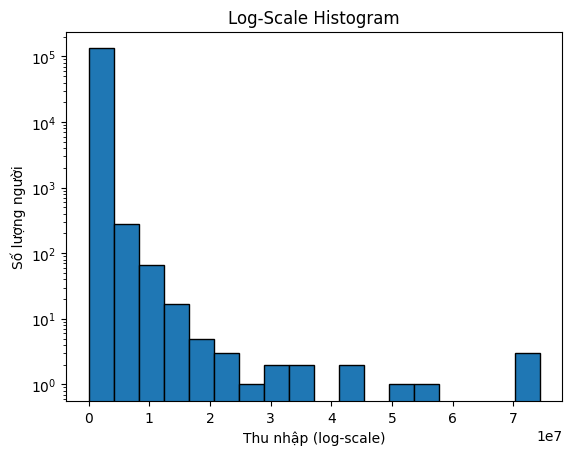

In [87]:
bin_size=int(1+np.log2(df_new.shape[0]))
print(bin_size)
hist=plt.hist(df_new["ConvertedCompYearly"], bins=bin_size, edgecolor='black', log=True)



plt.title('Log-Scale Histogram')
plt.xlabel('Thu nhập (log-scale)')
plt.ylabel('Số lượng người');


<p><b>Nhận xét 3:</b> Như vậy, ta thấy được đa số có mức lương từ 0 dến 1x10^7, Các mức khác có số lượng ít (khoảng dưới 100 người)</p>

<h5><font color = #E7B10A>- Các cột danh mục </font></h5>

Bước 1: Để phân tích phân bổ dữ liệu ở các cột danh mục, ta sẽ tạo dataframe `object_col_df` từ tất cả các cột `object` của `df_new`.

In [ ]:
object_col_df = df_new.select_dtypes(include='object')

Bước 2: Xây dựng 3 hàm `missing_ratio`, `num_values`, và `value_ratios` để tiến hành thống kê tỉ lệ khuyết dữ liệu, số các giá trị khác nhau, và đại diện 3 giá trị thống kê có lượt chọn cao nhất. 

In [ ]:
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return dict(list(((s.value_counts()/totalCount*100).round(1)).to_dict().items())[0: 3]) 

In [ ]:
object_col_df = object_col_df.agg([missing_ratio, num_values, value_ratios])
object_col_df

,MainBranch,Employment,Country,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,SurveyLength,SurveyEase,RemoteWork
missing_ratio,0.0,1.2,1.1,1.3,1.5,2.2,27.1,16.8,28.1,27.7,2.2,8.7,17.4,30.8,32.6,45.8,25.9,37.0,39.4,50.5,16.8,26.7,3.4,13.1,1.4,2.2,1.6,22.0,1.8,1.4,2.9,2.8,12.1
num_values,8,11,192,10,13,52,52,33,10,157,56,56,36,36,29,29,38,38,41,41,59,59,46,46,5,5,3,6,6,8,3,3,6
value_ratios,"{'I am a developer by profession': 72.8, 'I code primarily as a hobby': 6.0, 'I am not primarily a developer, but I write code sometimes as part of my work': 5.0}","{'Employed, full-time': 40.8, 'Employed full-time': 19.9, 'Student, full-time': 12.8}","{'United States of America': 19.5, 'India': 9.4, 'Germany': 7.5}","{'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 42.2, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 22.1, 'Some college/university study without earning a degree': 13.0}","{'Books / Physical media': 16.5, 'Other online resources (e.g., videos, blogs, forum)': 15.7, 'Online Courses or Certification': 14.3}","{'10': 7.4, '5': 7.0, '6': 6.3}","{'3': 8.1, '5': 7.8, '2': 7.7}","{'Developer, full-stack': 21.0, 'Developer, back-end': 16.7, 'Developer, front-end': 9.4}","{'20 to 99 employees': 20.5, '100 to 499 employees': 18.1, '10,000 or more employees': 12.9}","{'EUR European Euro': 24.9, 'USD United States dollar': 24.4, 'INR Indian rupee': 8.0}","{'JavaScript': 12.2, 'HTML/CSS': 10.3, 'Python': 9.2}","{'JavaScript': 9.9, 'Python': 9.5, 'TypeScript': 8.2}","{'MySQL': 16.4, 'PostgreSQL': 15.5, 'SQLite': 11.3}","{'PostgreSQL': 17.5, 'MySQL': 11.4, 'MongoDB': 11.3}","{'AWS': 16.6, 'Microsoft Azure': 14.8, 'Amazon Web Services (AWS)': 10.2}","{'AWS': 17.9, 'Microsoft Azure': 15.2, 'Google Cloud': 9.8}","{'Node.js': 9.9, 'jQuery': 9.3, 'React.js': 8.5}","{'React.js': 9.7, 'Node.js': 9.0, 'Vue.js': 8.3}","{'NumPy': 11.7, 'Pandas': 10.3, 'TensorFlow': 5.5}","{'NumPy': 9.6, 'TensorFlow': 8.6, 'Pandas': 8.5}","{'Docker': 16.8, 'npm': 11.3, 'Git': 10.2}","{'Docker': 18.4, 'Kubernetes': 10.3, 'Git': 10.0}","{'Visual Studio Code': 21.0, 'Visual Studio': 8.9, 'Notepad++': 7.8}","{'Visual Studio Code': 24.4, 'Visual Studio': 8.2, 'Vim': 7.3}","{'Stack Overflow': 55.0, 'Stack Exchange': 38.4, 'Collectives on Stack Overflow': 3.2}","{'A few times per week': 29.2, 'Daily or almost daily': 28.7, 'Multiple times per day': 19.7}","{'Yes': 79.6, 'No': 14.1, 'Not sure/can't remember': 6.3}","{'Less than once per month or monthly': 48.1, 'I have never participated in Q&A on Stack Overflow': 23.3, 'A few times per month or weekly': 17.0}","{'No, not really': 28.4, 'Yes, somewhat': 25.8, 'Neutral': 21.1}","{'25-34 years old': 38.7, '18-24 years old': 22.9, '35-44 years old': 20.5}","{'Appropriate in length': 77.3, 'Too long': 19.4, 'Too short': 3.4}","{'Easy': 69.1, 'Neither easy nor difficult': 29.6, 'Difficult': 1.3}","{'Unknow': 38.6, 'Hybrid (some remote, some in-person)': 26.0, 'Remote': 14.1}"


<a id="17"></a>

#### **<font color = #E7B10A>🔍Xuất file .csv để thuận tiện cho các bước sau</font>**

In [ ]:
df_new.to_csv("./Data/processed_data.csv", index=False)